# Loading Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import os


### A/Gathering Data

#### 1. Twitter  Archive Enhanced

In [2]:
df_archive=pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Image Predictions

In [3]:
# Downloading image preditions and read it. then creat dataframe for it
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'.split('/')[-1]
with open (file_name ,mode = 'wb')as file:
    file.write(response.content)

In [4]:
df_pred= pd.read_csv('image-predictions.tsv',sep ='\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter api

##### getting tweet data from twitter api 

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []
with open ('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [6]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#creating data frame from previous list that contain id,retweet count, and favorite count
tweet_data=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

In [8]:
#changing id column to tweet_id
tweet_data = tweet_data.rename(columns={'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
#saving data frame to csv file 
tweet_data.to_csv('tweet_data.csv',index= False)

In [10]:
df_api=pd.read_csv('tweet_data.csv')

In [11]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## B/Assessing Data

*****Assessing Data Vissualy and Programmaticaly to Detect Quality And Tidiness Issues*****

### A. Assessing Data From Twitter Archive Enhanced

In [12]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_archive.shape

(2356, 17)

In [14]:
sum(df_archive.duplicated())

0

In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#check if there records in twitter archive which are retweets
len(df_archive[df_archive.retweeted_status_id.isnull()==False])

181

In [17]:
df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
df_archive[df_archive.rating_numerator <10].count()[0]

440

In [19]:
df_archive[df_archive.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [20]:
df_archive[df_archive.rating_denominator !=10].count()[0]

23

In [21]:
df_archive[df_archive.rating_denominator !=10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [22]:
df_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Toby           7
Bailey         7
Daisy          7
Buddy          7
Oscar          6
Scout          6
Milo           6
Jax            6
Dave           6
Jack           6
Rusty          6
Koda           6
Bella          6
Stanley        6
Leo            6
Gus            5
            ... 
Sandra         1
Jimbo          1
Geoff          1
Philippe       1
Hubertson      1
Emanuel        1
Gustaf         1
Huck           1
Mosby          1
Laika          1
Amber          1
Glenn          1
Milky          1
Wesley         1
Snoop          1
Humphrey       1
Andru          1
Kota           1
Sky            1
Harlso         1
Aldrick        1
Raphael        1
Charleson      1
Tuck           1
Siba           1
Sprout         1
Crawford       1
Mason         

#### B. Assessing Data From Image Predictions

In [23]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161,True,Chesapeake_Bay_retriever,0.079051,True,Doberman,0.070226,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
1420,771770456517009408,https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg,1,papillon,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True
1424,772152991789019136,https://pbs.twimg.com/media/Crc9DEoWEAE7RLH.jpg,2,golden_retriever,0.275318,True,Irish_setter,0.100988,True,vizsla,0.073525,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
1079,717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
1129,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,True,golden_retriever,0.091661,True,sandbar,0.081799,False
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False


In [24]:
df_pred.shape

(2075, 12)

In [25]:
sum(df_pred.duplicated())

0

In [26]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
sum(df_pred.jpg_url.duplicated())

66

In [28]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### C. Assessing Data FromTwitter Api

In [29]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
2175,669037058363662336,336,698
445,819015337530290176,42228,0
216,850380195714523136,2915,13994
1654,683357973142474752,1059,3238
1589,686606069955735556,607,2071
871,761334018830917632,1669,5792
550,804475857670639616,2355,6886
803,772117678702071809,848,4165
1758,678708137298427904,2753,6082
368,828650029636317184,1544,10467


In [30]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
sum(df_api.duplicated())

0

In [32]:
# so, we have missing IDs 
2356-2354

2

# Observations

### Quality Issues

#### Twitter Enhanced Archive

 1- tweet_id  datatype are 'int' not 'str. 

2- 'timestamp' datatype are 'str' not 'datetime'.

3- have 181 retweets in archive data.

4- have 440 rating numerator less than 10 .

5- have 23 rating denominator != 10.

6- some dog names are invalid(none,a,an,....).

#### Image Preditctions

7- have 66 jpg_url dupicated.

8- undercross are used in coumn p1,p2 and p3 instead of spaces.

9- some P names started with uppercase letter while others starts with lowercase.

#### Twitter Api

10- Missing 2 IDs entries.

### Tidiness Issues

1- dog stages are separated to 4 columns. 

2- All data are related but divided to 3 dataframes.

## C/ Cleaning  Data

***Creating dataframe copies***

In [33]:
#creating data frame copies
df_archive_clean =df_archive.copy() 
df_pred_clean = df_pred.copy()
df_api_clean = df_api.copy()

In [34]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [35]:
df_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [36]:
df_api_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


***Define***

convert tweet_id datatype to 'str' in all dataframes

***Code***

In [37]:
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_pred_clean.tweet_id = df_archive_clean.tweet_id.astype(str)
df_api_clean.tweet_id = df_archive_clean.tweet_id.astype(str)

***Test***

In [38]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [39]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [40]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


***Define***

convert 'timestamp' datatype to datetime

***Code***

In [41]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

***Test***

In [42]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

***Define***

Merge all three datasets to one datasets

***Code***

In [43]:
#merge all datasets tables in one dataset
df_archive_clean = pd.merge(df_archive_clean, df_api_clean, on = 'tweet_id', how = 'left')
df_archive_clean = pd.merge(df_archive_clean, df_pred_clean, on = 'tweet_id', how = 'left')

In [44]:
sum(df_archive_clean.duplicated())

0

***Test***

In [45]:
#delete duplicated rows
df_archive_clean[df_archive_clean.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


***Define***

delete rows that represented retweets and related columns

***Code***

In [46]:
df_archive_clean=df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                

In [47]:
#drop related columns 
df_archive_clean=df_archive_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'])

***Test***

In [48]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1

***Define***

convert (rating_numerator and rating_denominator)datatype to 'float' 

***Code***

In [49]:
df_archive_clean[['rating_numerator', 'rating_denominator']] = df_archive_clean[['rating_numerator','rating_denominator']].astype(float)

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf            

***Test***

In [50]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
retweet_count         2173 non-null float64
favorite_count        2173 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf            

***Define***

Check for incorrect dog names, and make it as Nan then put it as "None" rows.

***Code***

In [55]:
df_archive_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
367            Alfie
2238           Alfie
1616           Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
2001           light
1095             mad
852               my
988              not
335              not
1747      officially
1206             old
369              one
924              one
1936             one
993              one
193            quite
169            quite
2326           quite
2030           space
22              such
1797         

In [57]:
#check for unclear dog names
df_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [58]:
df_archive_clean[df_archive_clean.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [60]:
#replace incorrect name with NaN
df_archive_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very'],np.NaN, inplace =True)

In [61]:
#put all NaN values in "None"
df_archive_clean['name'].fillna(value="None", inplace=True)

***Test***

In [62]:
df_archive_clean.name.value_counts()

None            780
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Penny             9
Tucker            9
Sadie             8
Lola              8
Winston           8
Toby              7
Daisy             7
Bella             6
Koda              6
Bo                6
Stanley           6
Oscar             6
Bailey            6
Jax               6
Milo              5
Bentley           5
Rusty             5
Dave              5
Leo               5
Louis             5
Chester           5
Buddy             5
Scout             5
Larry             4
Maggie            4
               ... 
Godzilla          1
Joey              1
Cleopatricia      1
Gunner            1
Blue              1
Aja               1
Leela             1
Rolf              1
Mojo              1
Opie              1
Sparky            1
Stormy            1
Dallas            1
Terrance          1
Pete              1
Anthony           1
Shaggy            1
Leonidas          1
Jennifur          1


***Define***

Replace( _ ) and ( - ) to spce in p1,p2 and p3 columns.

***Code***

In [63]:
df_archive_clean.p1 = df_archive_clean.p1.str.replace('_',' ')
df_archive_clean.p2 = df_archive_clean.p2.str.replace('_',' ')
df_archive_clean.p3 = df_archive_clean.p3.str.replace('_',' ')

df_archive_clean.p1 = df_archive_clean.p1.str.replace('-',' ')
df_archive_clean.p2 = df_archive_clean.p2.str.replace('-',' ')
df_archive_clean.p3 = df_archive_clean.p3.str.replace('-',' ')

***Test***

In [64]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,...,1.0,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,...,1.0,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,...,1.0,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,...,1.0,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


***Define***

Remove  rating_denominator which are less than 10.

***Code***

In [66]:
rating_denominator_not_equal_10 = df_archive_clean[df_archive_clean['rating_denominator']< 10]
rating_denominator_not_equal_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0.0,None,None,None,...,1.0,Gordon setter,0.469373,True,black and tan coonhound,0.270893,True,Rottweiler,0.153233,True
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,...,1.0,golden retriever,0.583875,True,cocker spaniel,0.203671,True,Labrador retriever,0.036122,True
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# drop these rows which have rating_denominator less than 10
df_archive_clean.drop([313], inplace=True)
df_archive_clean.drop([516], inplace=True)
df_archive_clean.drop([2335], inplace=True)

***Test***

In [68]:
df_archive_clean.rating_denominator.value_counts()

10.0     2153
50.0        3
80.0        2
20.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
15.0        1
Name: rating_denominator, dtype: int64

In [69]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
text                  2172 non-null object
expanded_urls         2115 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null float64
name                  2172 non-null object
doggo                 2172 non-null object
floofer               2172 non-null object
pupper                2172 non-null object
puppo                 2172 non-null object
retweet_count         2170 non-null float64
favorite_count        2170 non-null float64
jpg_url               1894 non-null object
img_num               1894 non-null float64
p1                    1894 non-null object
p1_conf               1894 non-null float64
p1_dog                1894 non-null object
p2                    1894 non-null object
p2_conf            

***Define***

Delete rows with missing photos

***Code***

In [75]:
df_archive_clean=df_archive_clean[df_archive_clean.jpg_url.notnull()]

In [76]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id              1894 non-null object
timestamp             1894 non-null datetime64[ns]
source                1894 non-null object
text                  1894 non-null object
expanded_urls         1840 non-null object
rating_numerator      1894 non-null float64
rating_denominator    1894 non-null float64
name                  1894 non-null object
doggo                 1894 non-null object
floofer               1894 non-null object
pupper                1894 non-null object
puppo                 1894 non-null object
retweet_count         1894 non-null float64
favorite_count        1894 non-null float64
jpg_url               1894 non-null object
img_num               1894 non-null float64
p1                    1894 non-null object
p1_conf               1894 non-null float64
p1_dog                1894 non-null object
p2                    1894 non-null object
p2_conf            

***Define***

Delete columns not needed in analysis

***Code***

In [82]:
df_archive_clean= df_archive_clean.drop(['expanded_urls'], 1)

***Test***

In [83]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              1894 non-null object
timestamp             1894 non-null datetime64[ns]
source                1894 non-null object
text                  1894 non-null object
rating_numerator      1894 non-null float64
rating_denominator    1894 non-null float64
name                  1894 non-null object
doggo                 1894 non-null object
floofer               1894 non-null object
pupper                1894 non-null object
puppo                 1894 non-null object
retweet_count         1894 non-null float64
favorite_count        1894 non-null float64
jpg_url               1894 non-null object
img_num               1894 non-null float64
p1                    1894 non-null object
p1_conf               1894 non-null float64
p1_dog                1894 non-null object
p2                    1894 non-null object
p2_conf               1894 non-null float64
p2_dog            

***Define***

melt dog types into one column.

***Code***

In [85]:
df_archive_clean = pd.melt(df_archive_clean,
                        id_vars=['tweet_id','timestamp', 'source', 'text','rating_numerator', 'rating_denominator',
                                              'name','favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
                                              'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'], value_name='dog_types')
df_archive_clean = df_archive_clean.drop('variable', axis=1)

***Test***

In [87]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 21 columns):
tweet_id              7576 non-null object
timestamp             7576 non-null datetime64[ns]
source                7576 non-null object
text                  7576 non-null object
rating_numerator      7576 non-null float64
rating_denominator    7576 non-null float64
name                  7576 non-null object
favorite_count        7576 non-null float64
retweet_count         7576 non-null float64
jpg_url               7576 non-null object
img_num               7576 non-null float64
p1                    7576 non-null object
p1_conf               7576 non-null float64
p1_dog                7576 non-null object
p2                    7576 non-null object
p2_conf               7576 non-null float64
p2_dog                7576 non-null object
p3                    7576 non-null object
p3_conf               7576 non-null float64
p3_dog                7576 non-null object
dog_types        

In [93]:
df_archive_clean.drop(df_archive_clean.query('(dog_types == "None")').index ,inplace=True)

In [94]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 9 to 6585
Data columns (total 21 columns):
tweet_id              356 non-null object
timestamp             356 non-null datetime64[ns]
source                356 non-null object
text                  356 non-null object
rating_numerator      356 non-null float64
rating_denominator    356 non-null float64
name                  356 non-null object
favorite_count        356 non-null float64
retweet_count         356 non-null float64
jpg_url               356 non-null object
img_num               356 non-null float64
p1                    356 non-null object
p1_conf               356 non-null float64
p1_dog                356 non-null object
p2                    356 non-null object
p2_conf               356 non-null float64
p2_dog                356 non-null object
p3                    356 non-null object
p3_conf               356 non-null float64
p3_dog                356 non-null object
dog_types             356 non-null obj

## D/ Storing Data

In [95]:
df_archive_clean.to_csv('twitter_archive_master.csv',index=False)

In [96]:
# load sorted data
df_master=pd.read_csv('twitter_archive_master.csv')

In [97]:
df_master.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,32467.0,7711.0,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,...,miniature poodle,0.201493,True,komondor,0.192305,True,soft coated wheaten terrier,0.082086,True,doggo
1,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,22349.0,3586.0,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,...,seat belt,0.375057,False,miniature pinscher,0.167175,True,Chihuahua,0.086951,True,doggo
2,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,12.0,10.0,None,15029.0,3884.0,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,...,West Highland white terrier,0.360465,True,pug,0.093494,True,ice bear,0.069038,False,doggo


## E/ Analyz and Vissualize Data

***1/ Relationship between retweet count and favorite count***

Text(0,0.5,'Favorite_Count')

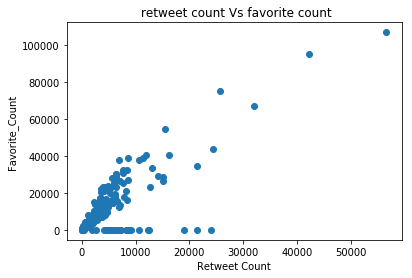

In [98]:
plt.scatter(x='retweet_count',y='favorite_count',data=df_master)
plt.title(' retweet count Vs favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite_Count')

****it looks like that there are linear relashionship between both parameters****

***Find out the dog category with the highest favorites rate***

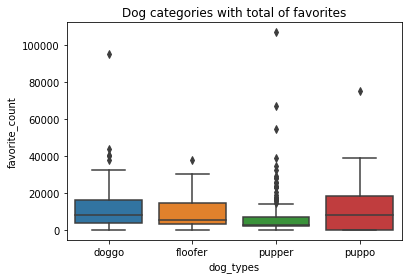

In [102]:
sns.boxplot(x='dog_types', y='favorite_count', data=df_master).set_title('Dog categories with total of favorites');

***Discover the ratio of dog rating distribution***

In [107]:
df_master['rating_ratio'] = df_master['rating_numerator']/df_master['rating_denominator']

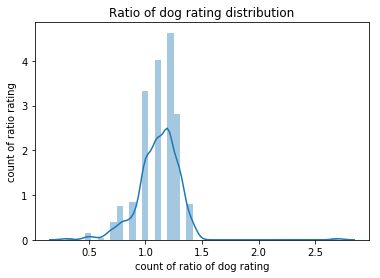

In [114]:

sns.distplot(df_master.rating_ratio).set_title('Ratio of dog rating distribution');
plt.xlabel('count of ratio of dog rating')
plt.ylabel('count of ratio rating')
plt.show();

***Find out the top 60 of dog names with retweets rate.***

In [116]:
df_master.drop(df_master.query('(name == "None")').index ,inplace=True)

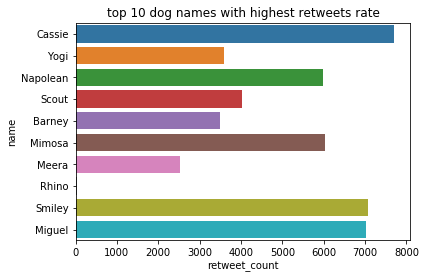

In [121]:
sns.barplot(y="name", x="retweet_count", data = df_master[0:10]).set_title('top 10 dog names with highest retweets rate');

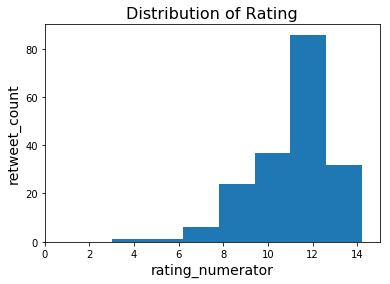

In [138]:
df_master['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('retweet_count', fontsize = 14)
plt.xlabel('rating_numerator', fontsize = 14)
plt.title('Distribution of Rating', fontsize = 16)
plt.show();

In [140]:
df_master.to_csv('wrangle_act_report.pdf', encoding='utf-8', index=False)